# Time Series Analysis

-------------------------------------------------------

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. The major components or pattern that are analyzed through time series are: Increase or decrease in the series of data over longer a period. Fluctuations in the pattern due to seasonal determinants over a short period.

Steps:
   1. Analyzed Closing Price of Stocks
   2. Trcaked Volume of Stocks being Traded on daily basis
   3. Examined daily Stocks price change
   4. Evaluated Monthly mean of closing price
   5. Correlation between stock prices of different companies
   6. Daily return of each stock and correlation between them
   7. Risk Analysis for all the companies
   

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
company_list = ['AAPL_data.csv','AMZN_data.csv','GOOG_data.csv','MSFT_data.csv']

In [5]:
# save all data in one dataframe

all_data = pd.DataFrame() # take an empty df

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df]) # concate all data in one df all_data 

In [6]:
all_data.shape

(4752, 7)

In [7]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


## Step 1: Closing Price of Stocks
--------------------------

In [8]:
# check the data types of each column

all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [9]:
# change the data type of date column to 'date'

all_data['date'] = pd.to_datetime(all_data['date'])

In [10]:
# now take an array of unique companies name

companies = all_data['Name'].unique()

In [11]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

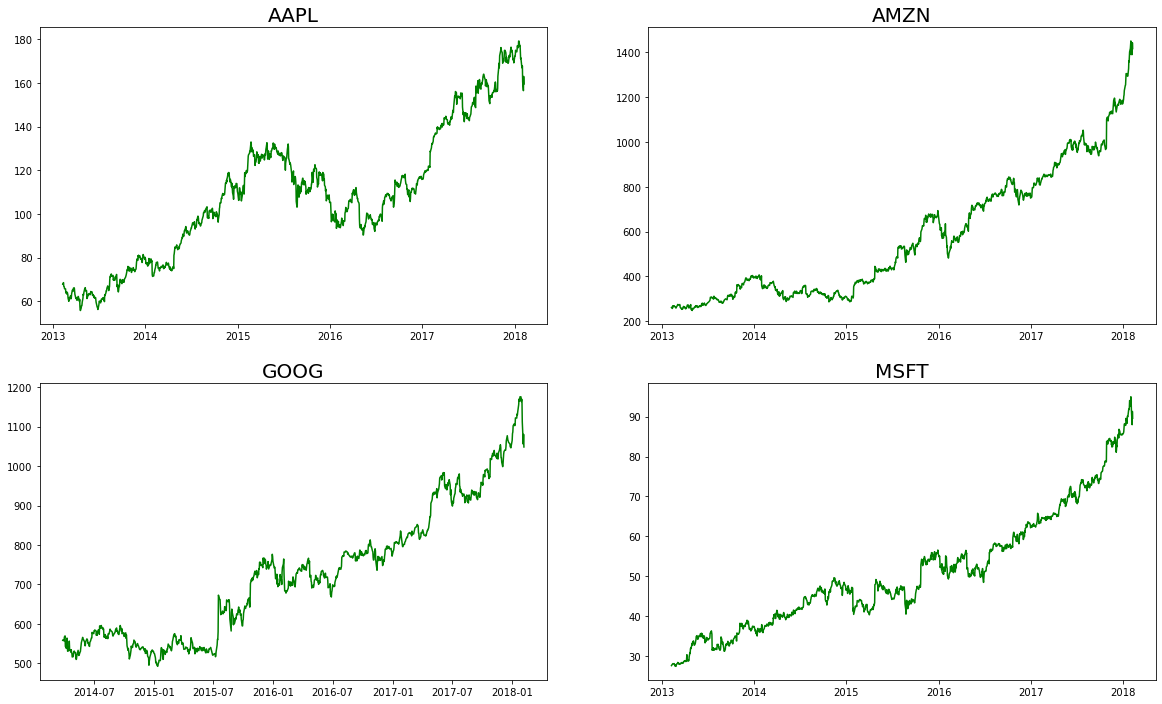

In [12]:
# use Enumerate() function. It can be used to loop over a list, tuple, dictionary, and string.
# Enumerate is very helpful when you want the index and the value when looping over list, tuple, dictionary, etc.
# Enumerate comes with an automatic counter/index to each of the items present in the list.

# here loop starts with index 1

plt.figure(figsize=(20,12))

for i,company in enumerate(companies,1):
        plt.subplot(2,2,i) # subplots in form of matix of 2 x 2
        df = all_data[all_data['Name'] == company]
        plt.plot(df['date'], df['close'], color = 'green')
        plt.title(company, fontsize=20)

## Step 2: Volume of Stocks being Traded on daily basis
------------------

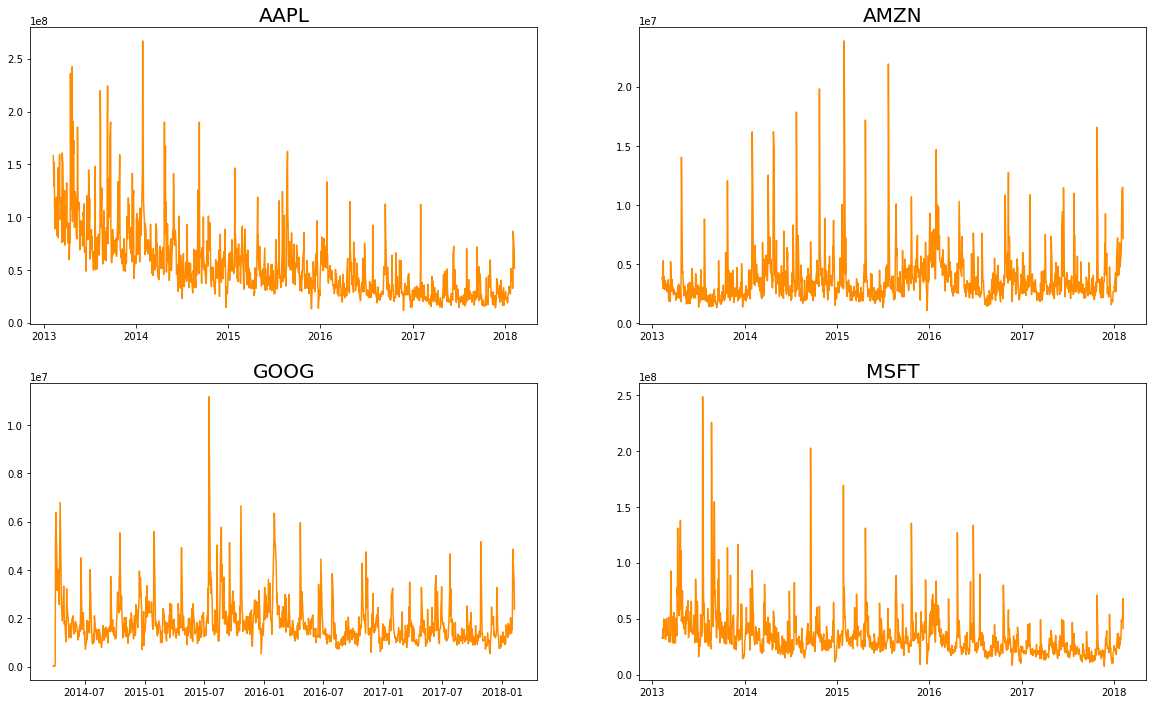

In [28]:
plt.figure(figsize=(20,12))

for i,company in enumerate(companies,1):
    plt.subplot(2,2,i) # subplots in form of matix of 2 x 2
    df = all_data[all_data['Name'] == company]
    plt.plot(df['date'], df['volume'], color = 'darkorange')
    plt.title(company, fontsize=20)

Now, analyze using plotly

In [13]:
# import plotly

import plotly.express as px

In [39]:
for company in companies:
    df = all_data[all_data['Name'] == company]
    fig1 = px.line(df, x='date', y='volume', title=company)
    fig1.show()

## Step 3: Daily Stock Price change
----------------

In [30]:
# read Apple's data

apple_data = pd.read_csv('AAPL_data.csv')

In [31]:
apple_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [35]:
# calculate daily price change by finding difference between closing and opening price

apple_data['daily_price_change'] = apple_data['close'] - apple_data['open']

In [36]:
apple_data.head()

,date,open,high,low,close,volume,Name,daily_price_change,one_day_%_return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [37]:
apple_data['one_day_%_return'] = (apple_data['daily_price_change'] / apple_data['close']) * 100

In [38]:
apple_data.head()

,date,open,high,low,close,volume,Name,daily_price_change,one_day_%_return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [41]:
# Now visualize daily price change

fig2 = px.line(apple_data, x='date', y='one_day_%_return', title=company)
fig2.show()

## Step 4: Monhly mean of closing price
--------------------

In [42]:
# resample the data

apple_data_2 = apple_data.copy()

In [43]:
# check the data types of columns

apple_data_2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
daily_price_change    float64
one_day_%_return      float64
dtype: object

In [44]:
# change the data type of 'date' column

apple_data_2['date'] = pd.to_datetime(apple_data_2['date'])

In [45]:
# set date column as your index

apple_data_2.set_index('date',inplace=True)

In [47]:
apple_data_2.head(10)

,open,high,low,close,volume,Name,daily_price_change,one_day_%_return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624
2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,-1.2414,-1.888431
2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,-0.1586,-0.241353
2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,-1.2628,-1.969389
2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL,0.0086,0.013496


In [48]:
apple_data_2['2013-02-08':'2013-02-14']

,open,high,low,close,volume,Name,daily_price_change,one_day_%_return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [51]:
# resample data on monthly basis

closing_month_mean = apple_data_2['close'].resample('M').mean()

In [52]:
closing_month_mean

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

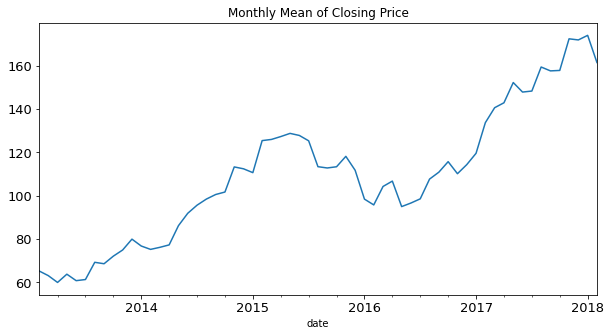

In [66]:
closing_month_mean.plot(figsize=(10,5), title='Monthly Mean of Closing Price', fontsize=13)

In [54]:
# resample data on monthly basis

closing_year_mean = apple_data_2['close'].resample('Y').mean()

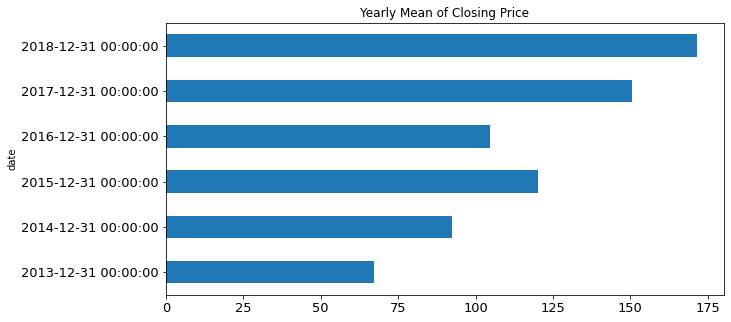

In [67]:
closing_year_mean.plot(kind = 'barh', figsize=(10,5), title='Yearly Mean of Closing Price', fontsize=13)

## Step 5: Correlation between stock prices of different companies
--------------------

In [68]:
apple = pd.read_csv('AAPL_data.csv')

In [69]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [70]:
amazon = pd.read_csv('AMZN_data.csv')
amazon.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [71]:
microsoft = pd.read_csv('MSFT_data.csv')
microsoft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [72]:
google = pd.read_csv('GOOG_data.csv')
google.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [73]:
# take closing prices for each company

close_data = pd.DataFrame()

In [75]:
close_data['apple'] = apple['close']

In [76]:
close_data['amazon'] = amazon['close']

In [77]:
close_data['google'] = google['close']

In [78]:
close_data['microsoft'] = microsoft['close']

In [79]:
close_data.head()

,apple,amazon,google,microsoft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


In [80]:
import seaborn as sns

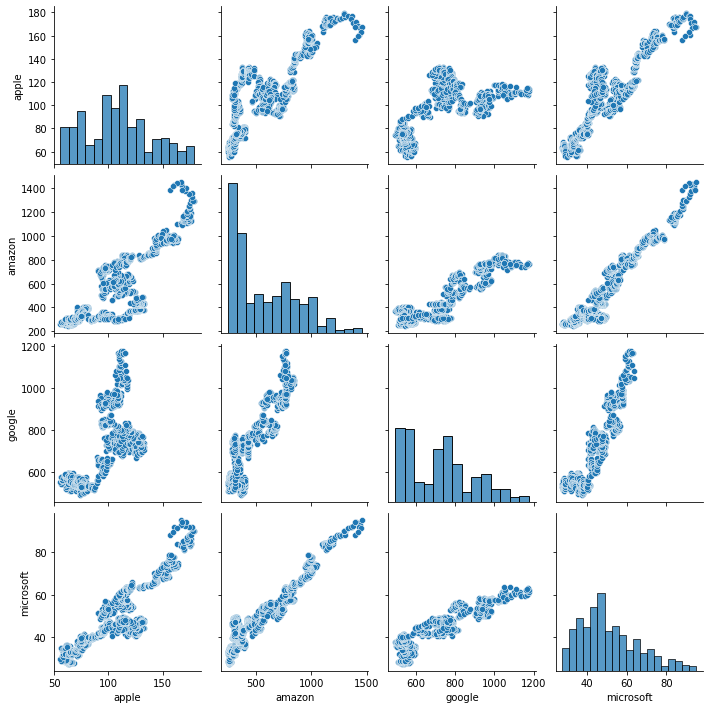

In [95]:
sns.pairplot(data = close_data)

The more the diagram looks linear, the strong the correlation is!

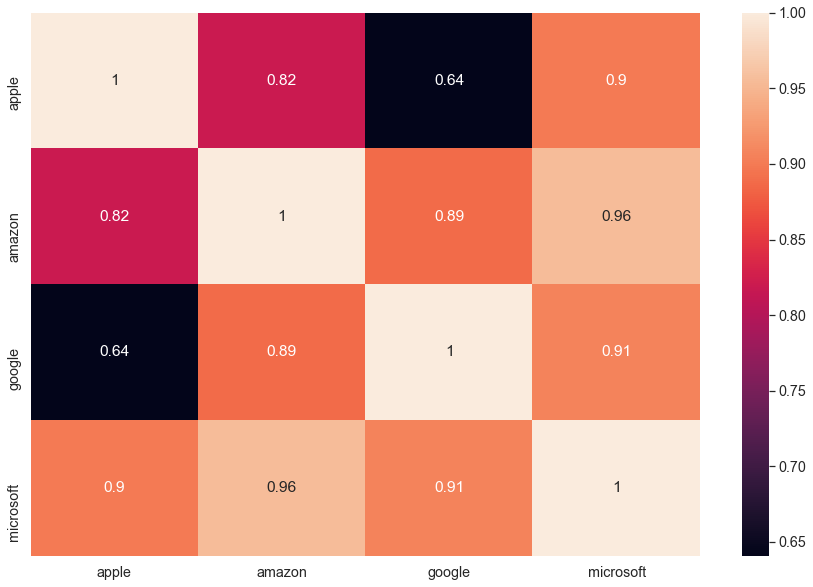

In [97]:
plt.figure(figsize=(15,10))
sns.set_theme(color_codes=True, font_scale=1.3)
sns.heatmap(close_data.corr(), annot = True)

## Step 6: Daily return of each stock and correlation between them
--------------

In [98]:
# consider apple dataset

apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [99]:
# take a blank dataframe

data_diff = pd.DataFrame()

In [100]:
data_diff['apple_price_change'] = ((apple['close'] - apple['open']) / apple['close']) * 100

In [101]:
data_diff['amazon_price_change'] = ((amazon['close'] - amazon['open']) / amazon['close']) * 100

In [102]:
data_diff['google_price_change'] = ((google['close'] - google['open']) / google['close']) * 100

In [103]:
data_diff['microsoft_price_change'] = ((microsoft['close'] - microsoft['open']) / microsoft['close']) * 100

In [104]:
data_diff.head()

,apple_price_change,amazon_price_change,google_price_change,microsoft_price_change
0,0.206325,0.209964,-1.708269,0.725953
1,0.714688,-2.328836,-0.216075,0.753769
2,-2.481344,-0.189409,-1.781065,0.000000
3,-0.042869,2.946525,1.489879,0.356761
4,0.443624,0.694548,0.334039,0.427960


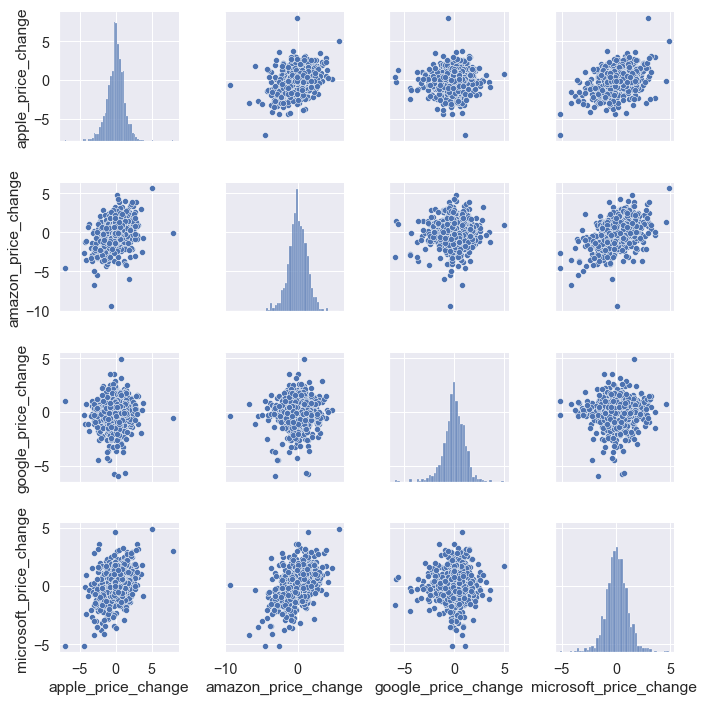

In [110]:
sns.pairplot(data = data_diff)

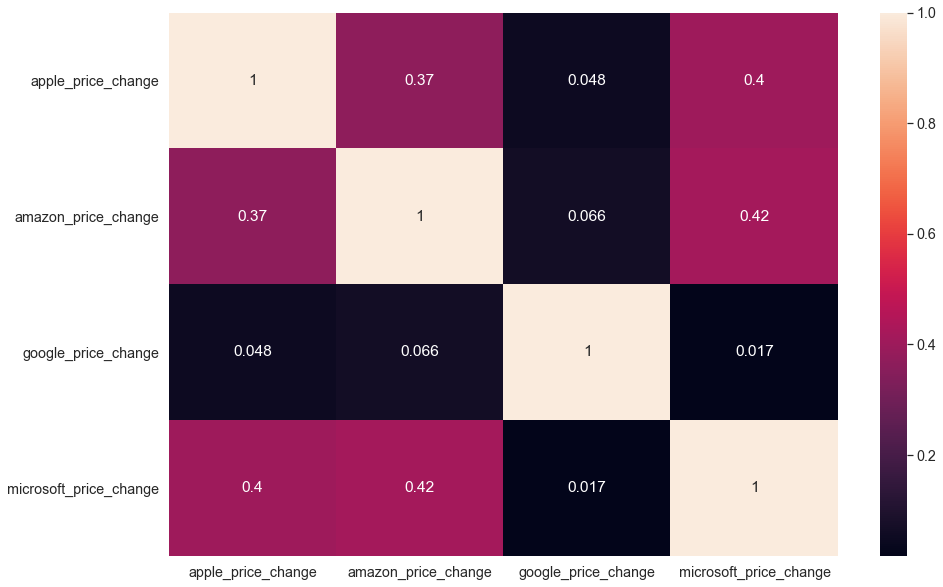

In [105]:
plt.figure(figsize=(15,10))
sns.set_theme(color_codes=True, font_scale=1.3)
sns.heatmap(data_diff.corr(), annot = True)

## Step 7: Risk Analysis for all the companies
---------------

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



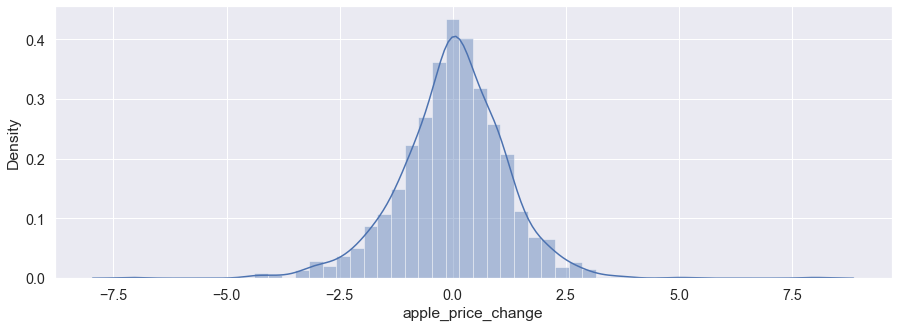

In [116]:
plt.figure(figsize=(15,5))
sns.distplot(data_diff['apple_price_change'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



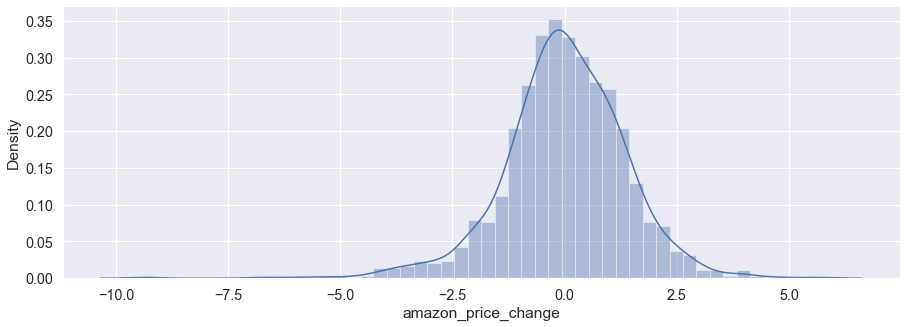

In [131]:
plt.figure(figsize=(15,5))
sns.distplot(data_diff['amazon_price_change'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



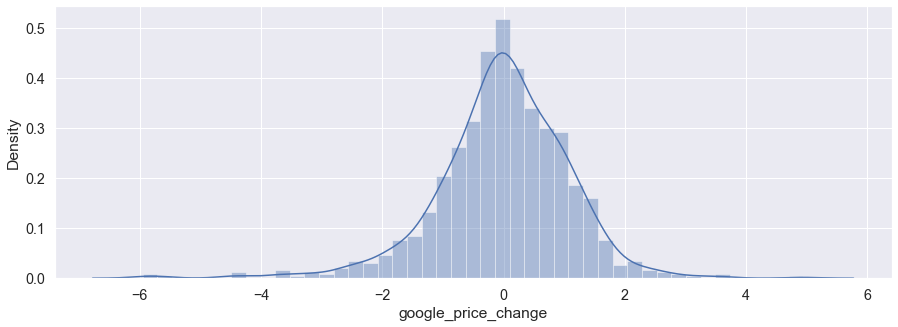

In [132]:
plt.figure(figsize=(15,5))
sns.distplot(data_diff['google_price_change'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



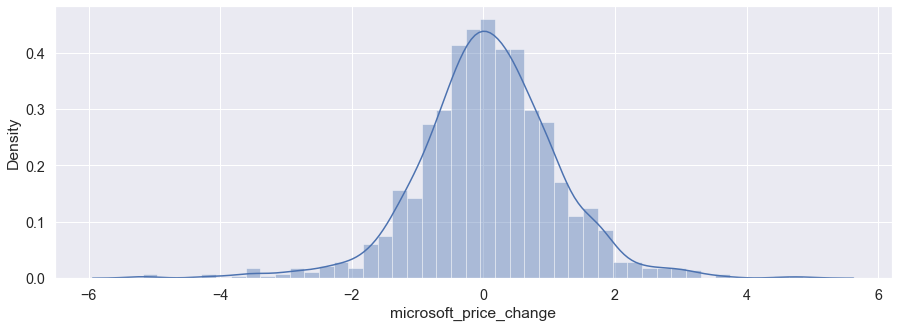

In [133]:
plt.figure(figsize=(15,5))
sns.distplot(data_diff['microsoft_price_change'])

In [121]:
# check the standard deviation of apple price change data ----> 68% of entire data

data_diff['apple_price_change'].std()

1.1871377131421237

In [122]:
# check the 2 point standard deviation of apple price change data ----> 95% of entire data

data_diff['apple_price_change'].std() * 2

2.3742754262842474

In [123]:
# check the 3 point standard deviation of apple price change data ----> 99.7% of entire data

data_diff['apple_price_change'].std() * 3

3.561413139426371

In [124]:
# calculate quantiles 

data_diff['apple_price_change'].quantile(.1)

-1.4246644227944307

In [128]:
data_diff.describe()

,apple_price_change,amazon_price_change,google_price_change,microsoft_price_change
count,1259.000000,1259.000000,975.000000,1259.000000
mean,-0.000215,-0.000398,-0.012495,0.076404
std,1.187138,1.358679,1.092560,1.059260
min,-7.104299,-9.363077,-5.952266,-5.177618
25%,-0.658021,-0.738341,-0.551963,-0.509241
50%,0.042230,-0.002623,0.024951,0.061069
75%,0.715427,0.852568,0.672649,0.703264
max,8.000388,5.640265,4.943550,4.861491


In [129]:
# transpose the table

data_diff.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_price_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
amazon_price_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
google_price_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
microsoft_price_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
